## 3-qubit Toffoli gate implementation with 4 CNOT gates

Theorem 1 in reference [1] states that a circuit consisting of CNOT gates and one-qubit gates which implements n-qubit 
Toffoli gate without ancillae requires at least 2n CNOT gates.
For n=3 that would mean at least 6 CNOT gates.

In this notebook we demonstrate a possibility of constructing 3-qubit Toffoli gate with 4 CNOT gates.

Whether such implementation is optimal needs further investigation.

This notebook proves that the implementation can be executed on a real IBM quantum computer (ibm_torino).

Reference [2] provides a Toffoli gate overview.

[1] https://arxiv.org/abs/0803.2316

[2] https://en.wikipedia.org/wiki/Toffoli_gate#cite_note-13

From the reference [1]:
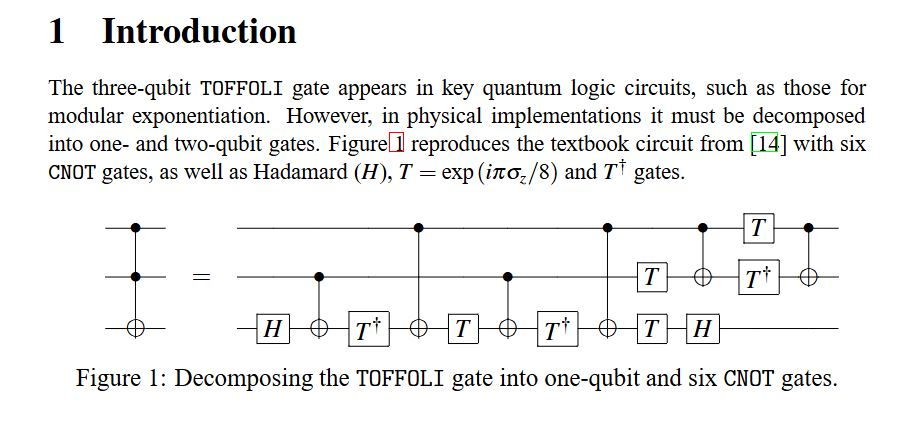

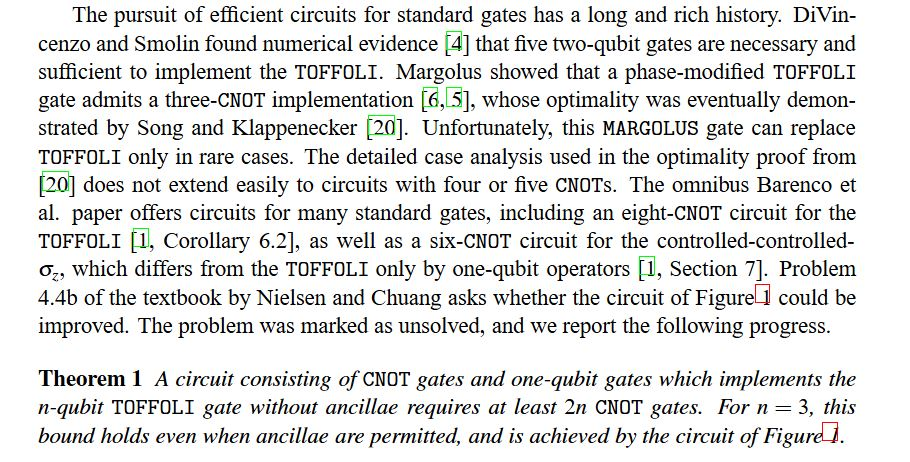

- Import needed libraries

In [1]:
import qiskit
print(qiskit.version.get_version_info())

2.0.0


In [ ]:
token = "1n07VYIxP4Nbj6KR2q0XBeReduj4JFHqPfhSY2XNC7D8"

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService.save_account(
    channel="ibm_cloud", # `channel` distinguishes between different account types
    token=token, # Your token is confidential.
    # Do not share your key in public code.
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/189f2bd555e943a0ba9b55e0329cf362:e48464cf-6f82-49cb-bb9e-f9c9f77a182d::",
    overwrite=True
    #name="<account-name>", # Optionally name this set of account credentials.
    #set_as_default=True, # Optionally set these as your default credentials.
)

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# If you named your credentials, optionally specify the name here, as follows:
# QiskitRuntimeService(name='account-name')
# If you don't specify a name, the default credentials are loaded.
service = QiskitRuntimeService()

In [3]:
backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibm_torino')>


## 3-qubit Toffoli gate implementation with 4 CNOT gates (shown below between 2 barriers) 

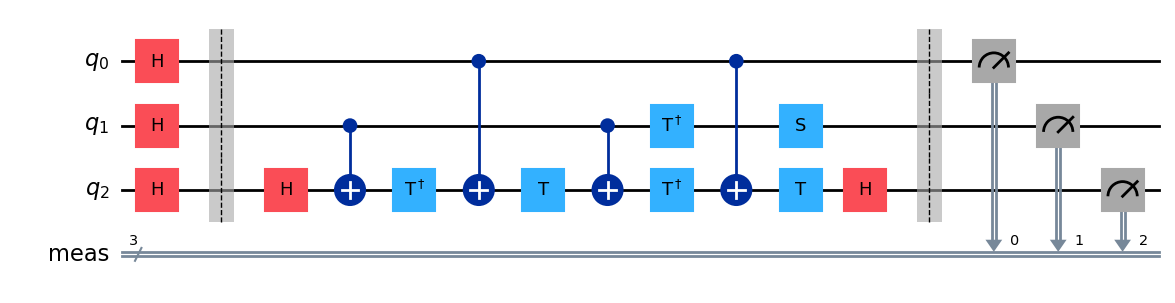

In [4]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit import QuantumRegister, ClassicalRegister
 
# Get a fake backend from the fake provider
#backend = FakeManilaV2()
 
## Define a 3-qubit quantum circuit
q = QuantumRegister(3, 'q')
circuit = QuantumCircuit(q)

#initial state of an equal superposition of |0> and |1> states
circuit.h(q[0]) #Hadammard on q[0]
circuit.h(q[1]) #Hadammard on q[1]
circuit.h(q[2]) #Hadammard on q[2]

circuit.barrier()

circuit.h(q[2]) #Hadammard on q[2]
circuit.cx(q[1],q[2]) #CNOT between q1 and q2
circuit.tdg(q[2]) #Hermitian conjugate T gate on q[2]
circuit.cx(q[0],q[2]) #CNOT between q0 and q2
circuit.t(q[2]) #T gate on q[2]
circuit.cx(q[1],q[2]) #CNOT between q1 and q2
circuit.tdg(q[1]) #Hermitian conjugate T gate on q[1]
circuit.tdg(q[2]) #Hermitian conjugate T gate on q[2]
circuit.cx(q[0],q[2]) #CNOT between q0 and q2
circuit.t(q[2]) #T gate on q[2]
circuit.s(q[1]) #S gate on q[1]
circuit.h(q[2]) #Hadammard on q[2]

## Finish off with the measurements
circuit.measure_all()

## Draw the circuit
circuit.draw(output="mpl")

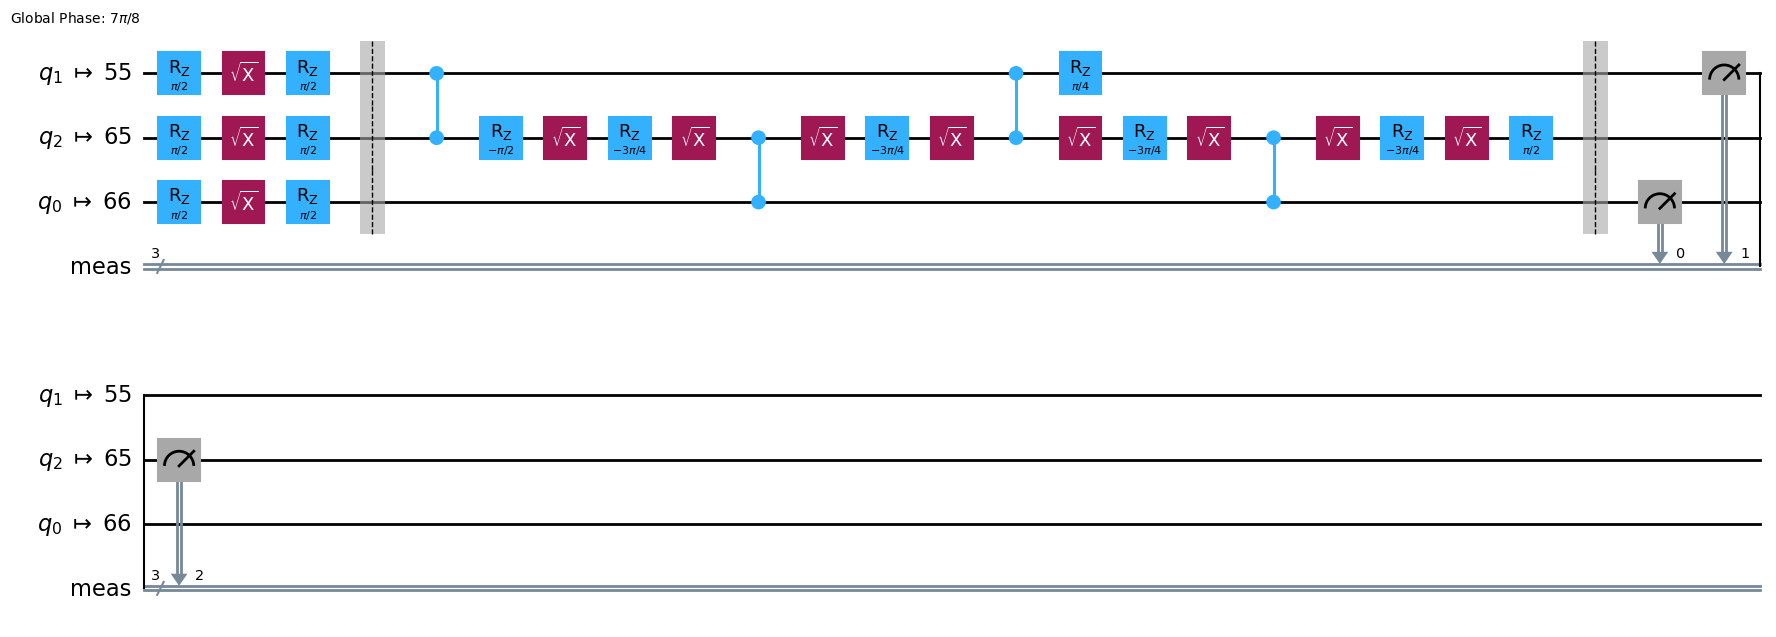

In [5]:
# Transpile the ideal circuit to a circuit that can be
# directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")

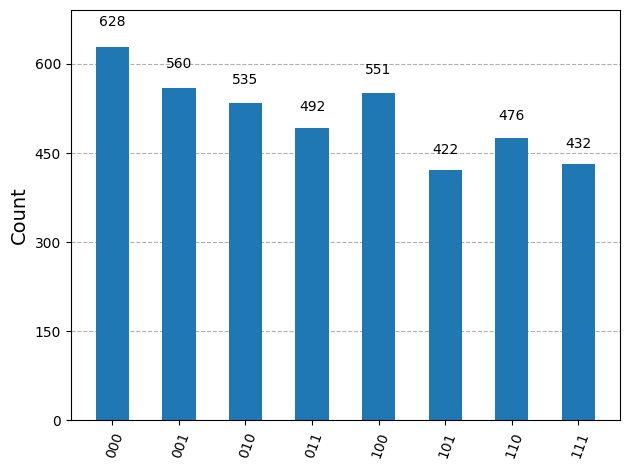

In [6]:
# Run the transpiled circuit using the backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit])
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)

As we can see the Toffoli gate behavior is demonstrated.

The above 3-qubit output states match below states for the simulator.

The q2 qubit state is flipped only when both q0 and q1 qubits are in the state |1>.

In green we mark input qubit states, respectively q0, q1, and q2.

In yellow we mark output qubit states, respectively q0, q1, and q2.
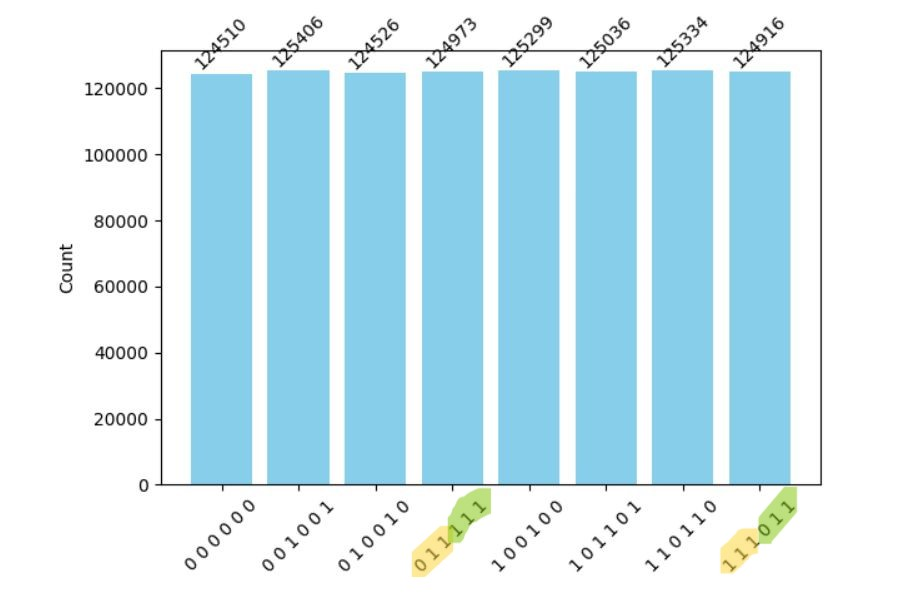

It took 7 seconds to execute the above transpiled circuit using ibm_torino backend
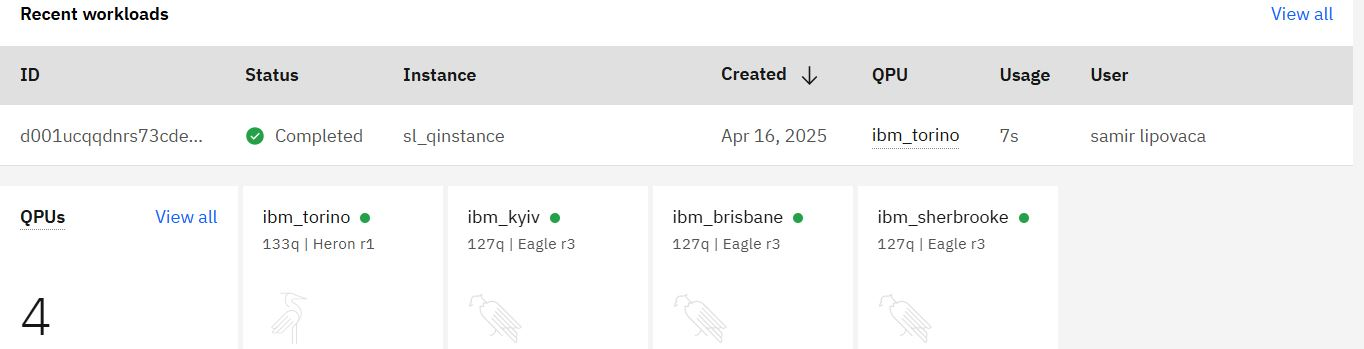

- some information about ibm_torino backend

In [13]:
status = backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs
print(f"status = {status}")
print(f"is_operational = {is_operational}")
print(f"jobs_in_queue = {jobs_in_queue}")

status = <qiskit_ibm_runtime.models.backend_status.BackendStatus object at 0x00000255703C8C70>
is_operational = True
jobs_in_queue = 59


In [10]:
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_torino
Version: 2
No. of qubits: 133



In [11]:
backend.qubit_properties(0)  # properties of qubit 0

QubitProperties(t1=0.0002240872756806737, t2=0.0003146030332319314, frequency=None)

In [14]:
backend.basis_gates

['cz', 'id', 'rz', 'sx', 'x']

In [16]:
backend.simulator

False

- The current qiskit (2.0.0) implementation of the Toffoli gate (with 6 CNOT gates)

Using matplotlib backend: tkagg


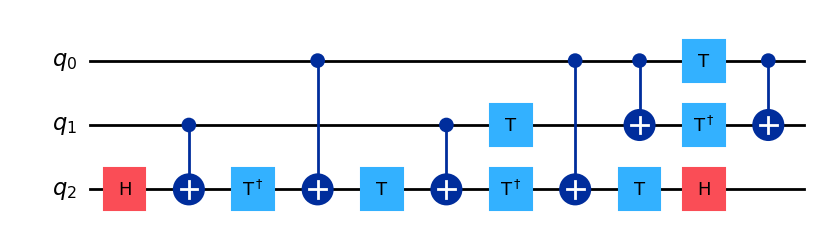

In [3]:
%matplotlib
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.decompose().draw("mpl")